In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,Flatten
from datetime import datetime, date, time

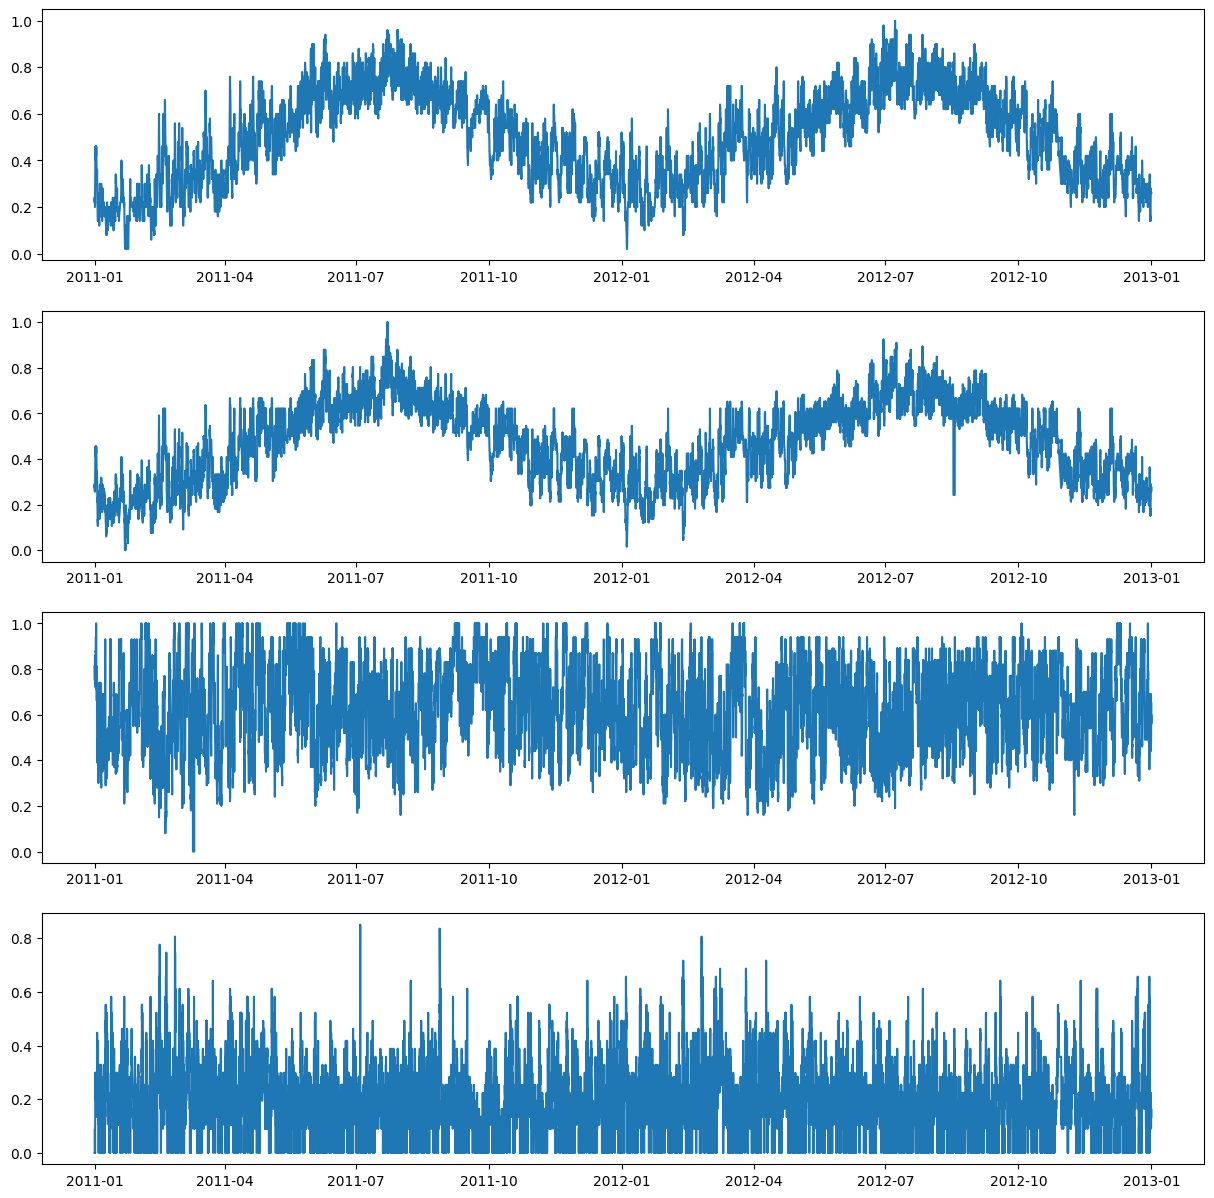

In [8]:


#loading dataset
df = pd.read_csv('hour.csv', header=0, sep=',', quotechar='"', usecols=['holiday', 'workingday', 'hr', 'temp', 'atemp', 'hum', 'windspeed', 'cnt','dteday'])
df['workingday'] = df['workingday'].astype('category')

# (Q1.a) What are we doing here? print or plot values for some features before and after these lines.
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']

df['formatted_date'] = df['dteday'] + ' ' + np.where(df['hr'] < 10, '0' + df['hr'].astype(str), df['hr'].astype(str)) + ':00:00'
dates = df['formatted_date'].values
dates = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in dates]
temps = df['temp'].values
atemps = df['atemp'].values
hums = df['hum'].values
windspeeds = df['windspeed'].values

import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 1, figsize=(15, 15))
axs[0].plot(dates, temps)
axs[1].plot(dates, atemps)
axs[2].plot(dates, hums)
axs[3].plot(dates, windspeeds)
plt.show()





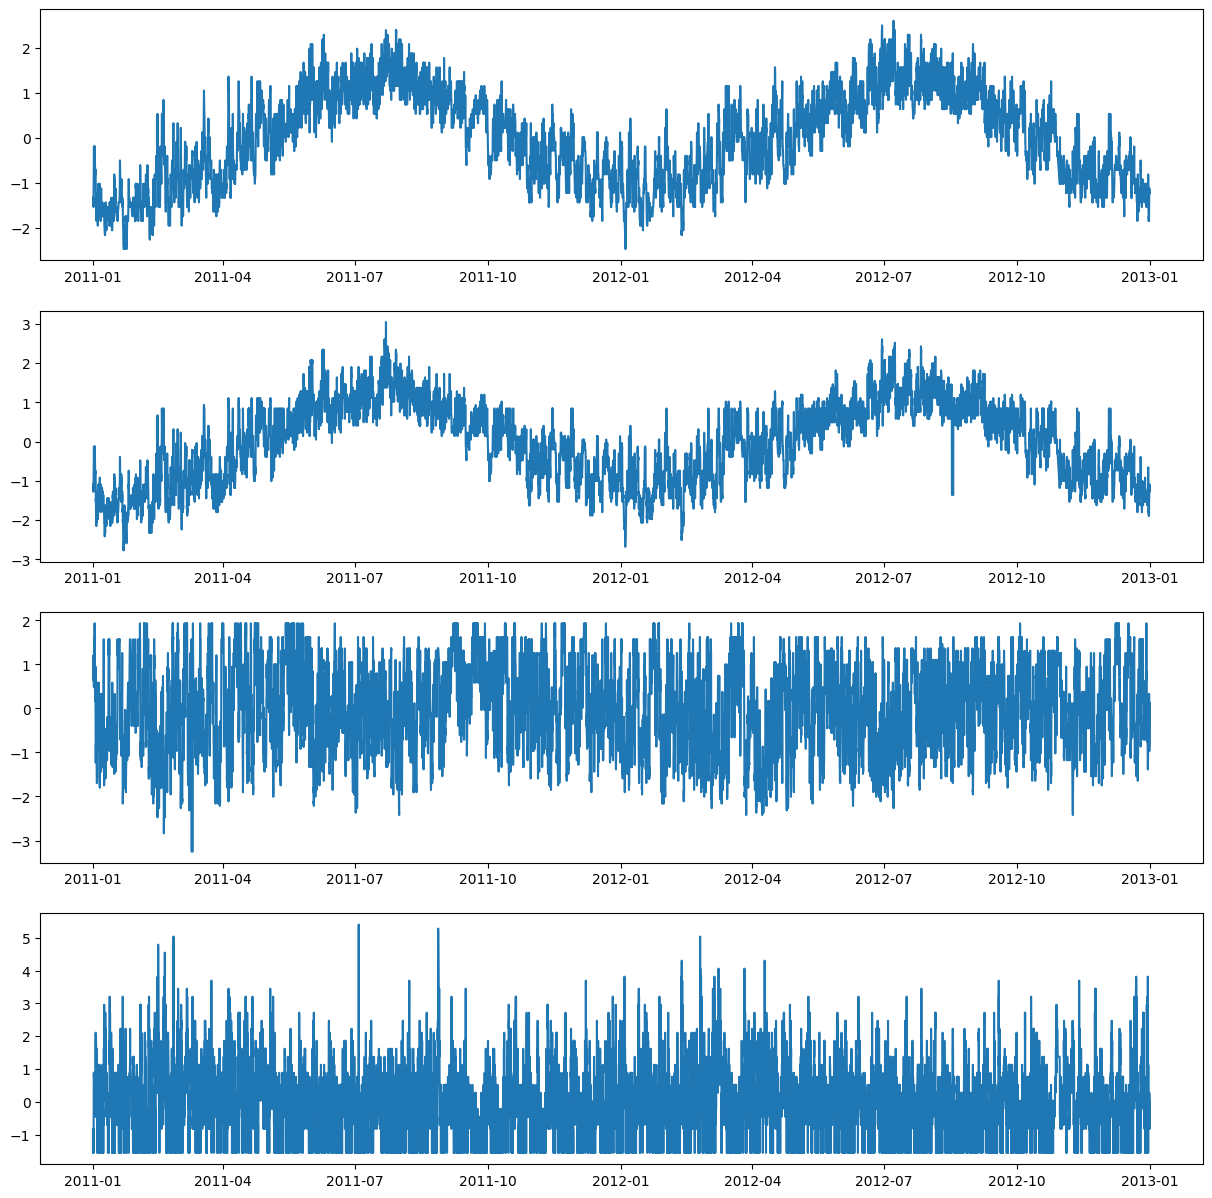

Epoch 1/50
761/761 [==============================] - 3s 3ms/step - loss: 30042.3887
Epoch 2/50
761/761 [==============================] - 2s 3ms/step - loss: 22567.5918
Epoch 3/50
761/761 [==============================] - 3s 4ms/step - loss: 21260.1484
Epoch 4/50
761/761 [==============================] - 3s 3ms/step - loss: 19997.6426
Epoch 5/50
761/761 [==============================] - 2s 3ms/step - loss: 19130.0352
Epoch 6/50
761/761 [==============================] - 2s 3ms/step - loss: 18404.8828
Epoch 7/50
761/761 [==============================] - 2s 3ms/step - loss: 17849.2852
Epoch 8/50
761/761 [==============================] - 3s 4ms/step - loss: 17344.0039
Epoch 9/50
761/761 [==============================] - 2s 3ms/step - loss: 16869.9746
Epoch 10/50
761/761 [==============================] - 2s 3ms/step - loss: 16396.9609
Epoch 11/50
761/761 [==============================] - 2s 3ms/step - loss: 15957.4824
Epoch 12/50
761/761 [==============================] - 3s 3ms/s

In [17]:
scaled_features = {}
for feature in numerical_features:
    mean, std = df[feature].mean(), df[feature].std()
    scaled_features[feature] = [mean, std]
    df.loc[:, feature] = (df[feature] - mean) / std

"""
To answer Question 1 we apply standard normalization to the dataset
so the features have a std of 1 and a mean of 0.

This helps prevent any data with larger inputs from having a bigger effect on
the data than data with smaller inputs. Basically all data is treated the same
for the most parts. If we notice the wind data still has some large inputs.
"""

X = df.drop(['cnt','dteday','formatted_date'], axis=1)
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

temps = df['temp'].values
atemps = df['atemp'].values
hums = df['hum'].values
windspeeds = df['windspeed'].values

fig, axs = plt.subplots(4, 1, figsize=(15, 15))
axs[0].plot(dates, temps)
axs[1].plot(dates, atemps)
axs[2].plot(dates, hums)
axs[3].plot(dates, windspeeds)
plt.show()

# Q1.b Define MLP architecture
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

# # Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16)
"""
Test 1
2 Layers
Layer 1 : 64 Neurons : Relu
Layer 3 : 1 Neuron : Linear
Hyper Parameters :
Epochs : 50
Batch Size : 32
MSE 16k
R2 0.4
"""

"""
Test 2
3 Layers
Layer 1 : 64 Neurons : Relu
Layer 2 : 32 Neurons : Relu
Layer 3 : 1 Neuron : Linear
Hyper Parameters :
Epochs : 50
Batch Size : 32
MSE 12k
R2 0.62
"""

"""
Test 3
3 Layers
Layer 1 : 64 Neurons : Relu
Layer 2 : 32 Neurons : Relu
Layer 3 : 1 Neuron : Linear
Hyper Parameters :
Epochs : 50
Batch Size : 16
MSE 8k
R2 0.72
"""
# # Evaluate the model on the test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


In [18]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.728706534783331
